<a href="https://colab.research.google.com/github/felixjay3/planets/blob/main/ABM_toy_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Agent-based toy model of disease transmission**

Agent-based model (ABM): ABM=**O**bjects+**A**ttributes+**R**ules

Use object-oriented programming as design principle for agent-based models!


### **O**bject

*   primary **object** is the human host (Python: class)

### **A**ttributes
*   the host has certain **attributes** such as personal identification number, age, location, ... (Python: attributes)

### **R**ules
*   certain attributes change according to **rules**, e.g. aging, movement (Python: methods)



In [ ]:
import random
import numpy as np

##we create a host class with certain attributes (and default values)
class host :
  """host characteristics"""
  def __init__( self , pin="", age=0 , location="indoor"):
    self.pin = pin
    self.age = age
    self.location = location
##now we add methods for the class, e.g. movement, aging
  """movement"""
  def changeLocation( self ):
    if self.location =="indoor":
      self.location = "outdoor"
    else:
      self.location = "indoor"
  """aging"""
  def aging ( self):
    self.age +=1


Let's play with the attributes and rules!

In [ ]:
###1) Let's create a 5-year old host called Lucy and let her age throughout 5 years:
Lucy=host(pin="Lucy5",age=5)
##Let's get her age
print(Lucy.age)
##Times flies by
[Lucy.aging() for i in range(0,5)]
##Let's get her age
print(Lucy.age)

###2) Lucy always stays indoor, let's move her outdoor at the age of 6
print(Lucy.location)
Lucy.changeLocation()
print(Lucy.location)

5
10
indoor
outdoor


We can always ask python, which attributes and rules a certain object has:

In [ ]:
###Let's get the methods and attributes of Lucy
methodAttr_list = [method for method in dir(Lucy) if method.startswith('__') is False]
print(methodAttr_list)

['age', 'aging', 'changeLocation', 'location', 'pin']


**Exercise 1:** Create a host object with the attributes gender, and create an instance of Lucy.

From one to many individuals: we create a list of hosts following a given age distribution:


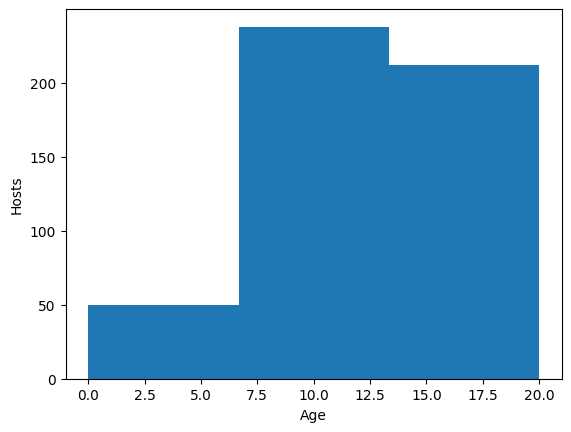

In [ ]:
##We create 500 individuals
N=500
##we create a list (array)
hosts=[host(pin=i,age=a) for i,a in zip(range(N),random.choices ([ 0 , 10, 20] ,weights =[ 0.1 , 0.5, 0.4 ],k=N))]
##let's plot the age of our hosts
import matplotlib.pyplot as plt
x=[y.age for y in hosts]
plt.hist(x, density=False, bins=3)
plt.ylabel('Hosts')
plt.xlabel('Age');

**Exercise 2:** Download the age pyramid of Rwanda from https://www.populationpyramid.net/rwanda/2023/ and initialize 1000 hosts according to this gender and age distribution

We let the host population age as a **cohort** (i.e. no new hosts can join the population, no deaths) for 5 years, a celebrate the hosts' 15th birthday

In [ ]:
for i,j in enumerate(hosts):
  for k in range(0,5):
    hosts[i].aging()

birthdayHosts = [host.pin for host in hosts if host.age == 15]
print(birthdayHosts)

[0, 1, 2, 9, 10, 12, 14, 19, 20, 21, 22, 25, 26, 28, 29, 31, 32, 34, 35, 36, 41, 43, 45, 46, 49, 52, 55, 57, 61, 63, 67, 68, 71, 76, 78, 80, 83, 84, 85, 86, 88, 89, 97, 98, 99, 100, 101, 107, 109, 110, 111, 116, 117, 119, 122, 128, 129, 135, 137, 141, 143, 144, 145, 146, 149, 158, 159, 161, 162, 164, 167, 168, 169, 170, 172, 173, 176, 177, 178, 180, 181, 187, 190, 191, 192, 193, 196, 198, 199, 202, 207, 208, 212, 214, 215, 217, 218, 221, 223, 224, 225, 226, 227, 229, 237, 239, 240, 241, 242, 243, 246, 248, 254, 255, 256, 257, 261, 262, 264, 267, 269, 270, 273, 274, 276, 277, 278, 280, 281, 282, 284, 288, 289, 290, 294, 296, 297, 298, 299, 301, 302, 303, 306, 313, 317, 318, 320, 321, 325, 326, 329, 330, 332, 333, 336, 337, 339, 340, 341, 342, 345, 346, 347, 348, 349, 354, 358, 359, 361, 364, 365, 367, 368, 373, 375, 376, 378, 379, 380, 381, 384, 385, 387, 391, 392, 393, 395, 397, 403, 405, 406, 407, 408, 409, 410, 411, 415, 416, 417, 422, 423, 424, 426, 428, 429, 431, 432, 433, 434, 435

## Dynamical systems = change of host attributes over **time**
We are interested in the change of the host's attributes over time. We need to define chronological time *T*, a time unit and time increment size *DeltaT*. At the same time, we also add infection attributes to the host class. In order to record the history of each host, we change the attributes to lists


In [ ]:
##we create a host class with certain attributes (and default values)
class host :
  """host characteristics"""
  def __init__( self , pin="", T=0, age=0 , location="indoor", isInfected=False):
    self.pin = pin
    self.T = [T]
    self.age = [age]
    self.location = [location]
    self.isInfected = [isInfected]
##now we add methods for the class, e.g. movement, aging
  """movement"""
  def changeLocation( self ):
    if self.location =="indoor":
      self.location.append("outdoor")
    else:
      self.location.append("indoor")
  """aging"""
  def aging (self,DeltaT):
    self.age.append(self.age[-1]+DeltaT)

We initialize our cohort at time T=0, the time unit is in years, the time increment for updates of the dynamical system is 5 days: DeltaT=5/365.

We also change location every 5 days based on some parameter *ProbaChange*.

In [ ]:
hosts=[host(pin=i,age=a) for i,a in zip(range(N),random.choices ([ 0 , 10, 20] ,weights =[ 0.1 , 0.5, 0.4 ],k=N))]
DeltaT=5/365
ProbaChange=0.4
###We update the system every 5 days and every host
for k in np.arange(0,5,DeltaT):
  for i,j in enumerate(hosts):
    hosts[i].T.append(hosts[i].T[-1]+DeltaT)
    hosts[i].aging(DeltaT)###aging
    location=random.choices ([True,False] , weights =[ ProbaChange ,1 - ProbaChange ])[0]
    if location:
      hosts[i].changeLocation()
    else:
      hosts[i].location.append(hosts[i].location[-1])


It is time to introduce an infection process. Here some rules we want to implement:
* You can only get infected, while you are not already infected
* If a host is located indoors, he or she has higher infection probability
* The infection pressure is proportional to the total number of infected hosts
* We also allow clearance of infection, but without any immunity

To implement infection, we create a new method for our python class host:

In [ ]:
##we create a host class with certain attributes (and default values)
class host :
  """host characteristics"""
  def __init__( self , pin="", T=0, age=0 , location="indoor", isInfected=False):
    self.pin = pin
    self.T = [T]
    self.age = [age]
    self.location = [location]
    self.isInfected = [isInfected]
##now we add methods for the class, e.g. movement, aging
  """movement"""
  def changeLocation( self ):
    if self.location =="indoor":
      self.location.append("outdoor")
    else:
      self.location.append("indoor")
  """aging"""
  def aging (self,DeltaT):
    self.age.append(self.age[-1]+DeltaT)
  """getInfected"""
  def getInfected(self):
    if self.isInfected[-1]==False:
      self.isInfected.append(True)
    else:
      self.isInfected.append(False)


In [ ]:
##demographics
hosts=[host(pin=i,age=a) for i,a in zip(range(N),random.choices ([ 0 , 10, 20] ,weights =[ 0.1 , 0.5, 0.4 ],k=N))]

##model parameters
DeltaT=5/365
ProbaChange=0.4
ProbaInfection=0.005
ProbaClearance=0.004
I0=50/N
InfectionIndoorMultiplier=8

##initial condition
initialCondition=random.choices([True,False],weights=[I0,1-I0],k=N)
for i,j in enumerate(hosts):
  hosts[i].isInfected=[initialCondition[i]]

###We update the system every 5 days and for every host
for k in np.arange(0,15,DeltaT):
  infectionPressure=ProbaInfection*sum([host.isInfected[-1] for host in hosts])/N
  for i,j in enumerate(hosts):
    ##time increment
    hosts[i].T.append(hosts[i].T[-1]+DeltaT)
    ##aging
    hosts[i].aging(DeltaT)
    ##infection
    if hosts[i].location=="indoor":
      infectionPressure*=InfectionIndoorMultiplier ##we need actually a Holling type 3 respone curve here, but hey, it is just a toy
    exposure=random.choices([True,False] , weights =[ infectionPressure ,1 - infectionPressure])[0]
    if exposure:
      hosts[i].getInfected()
    else:
      hosts[i].isInfected.append(hosts[i].isInfected[-1])
    ##clear infection, no immunity, clearance possible only if no new infection happend in this time step
    if not (exposure & ~hosts[i].isInfected[-2]):
      clearance=random.choices([True,False] , weights =[ProbaClearance ,1 - ProbaClearance])[0]
      hosts[i].isInfected[-1]=hosts[i].isInfected[-1] & ~clearance
    ##location
    location=random.choices([True,False] , weights =[ ProbaChange ,1 - ProbaChange ])[0]
    if location:
      hosts[i].changeLocation()
    else:
      hosts[i].location.append(hosts[i].location[-1])

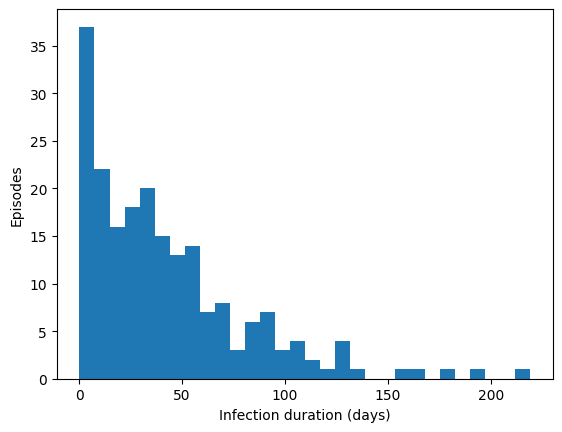

In [ ]:
infectionDuration=[]
for i,j in enumerate(hosts):
  if any(hosts[i].isInfected):
    infectionDuration.append(sum(hosts[i].isInfected)/5)
plt.hist(infectionDuration, density=False, bins=30)
plt.ylabel('Episodes')
plt.xlabel('Infection duration (days)')
plt.show()

Let's plot a prevalence trajectory:

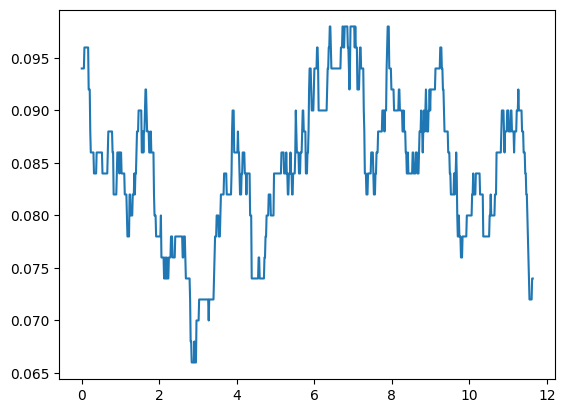

In [ ]:
prev=[]
for t in range(850):
  prevt=[]
  for i,j in enumerate(hosts):
    prevt.append(hosts[i].isInfected[t])
  prev.append(sum(prevt)/N)

plt.plot(hosts[1].T[0:850],prev)
plt.show()

## **This starts to become a mess!**
Here some imporant design tips:

* we have already done several random number draws, set the **seed** to make your simulations reproducible

* check whether your inputs provided to your function arguments are of the right type with *isinstance*

* for debugging, you need a **logging** system in your code, python has the *logging* module

* to read model outputs, it is good practice to create a *reporter* class that can **access** attribute values of your hosts

* in order to efficiently manage model and simulation parameter inputs and the **update** of the dynamical system, you should also create a *simulator* or *scheduler* class

* a model is never "done", it will always evolve; by creating a generic class for hosts you can write variations of your model by creating **subclasses** from this generic host class, these will inherit all the attributes automatically

* for now, our model is Markovian, it does not need to look into the past for updates, for non-Markovian mechanism, updating can become very slow, think of an appropriate **data structure**, e.g. python arrays as implemented in the python package [covasim](https://github.com/institutefordiseasemodeling/covasim) or use database systems such as MongoDB

* python modules like [mesa](https://mesa.readthedocs.io/en/stable/) provide some generic ideas how to design ABMs

* for Malaria, there are several ABMs with high level of details: [EMOD](https://docs.idmod.org/projects/emod-malaria/en/latest/), [OpenMalaria](https://github.com/SwissTPH/openmalaria/wiki), or [malariasimulation](https://mrc-ide.github.io/malariasimulation/). All these models have been designed and implemented over many years by multiple people, not in high-level programming languages such as Python, maybe for a good reason...

### **Collaborative group work challenge**

We want to enhance our toy model with some important features in a collaborative way. Each feature should be implemented separately by a group of 3-4 people, but in a way such that it does not obstruct the implementation of the other features. Also, each feature should be tested whether it is doing what it is supposed to do. Initially, each group is given 30 minutes to work concurrently, but we allow 10 minutes additional time for communication between the groups. Eventually, we will merge all the features into one code. Please discuss the **technical challenges**, but also the **group dynamics**.

**Feature 1**: Immunity by recent infection, i.e. if you had an infection recently, i.e. less than 60 days ago, you cannot get infected.

**Feature 2**: Once your are infected, you are twice less likely to change location.

**Feature 3**: You give a therapeutic drug targeting ages 5-10 who have been tested positive, the drug clears infection with 0.8 probability.

**Feature 4**: The infection pressure is periodic $f(t)=K(1+\sin(t \omega 2\pi))$.

**Feature 5**: How can you visualize the outputs (by age group, infection status, location)?